* Reference: <a href="https://www.datacamp.com/community/tutorials/kaggle-machine-learning-eda">Kaggle Tutorial: EDA & Machine Learning</a>
* Reference: <a href="https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184">A Gentle Introduction to Exploratory Data Analysis</a>

## Plots in this notebook
* Categorical plots
    * <a href="https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot">catplot</a>: Figure-level interface for drawing categorical plots onto a FacetGrid.
    * <a href="https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot">stripplot</a>: Draw a scatterplot where one variable is categorical.
    * <a href="https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot">swarmplot</a>: Draw a categorical scatterplot with non-overlapping points.
    * <a href="https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot">countplot</a>: Show the counts of observations in each categorical bin using bars.
* Distribution plots
    * <a href="https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot">pairplot</a>: Plot pairwise relationships in a dataset.
    * <a href="https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot">distplot</a>: Flexibly plot a univariate distribution of observations.
* Regression plots
    * <a href="https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot">lmplot</a>: Plot data and regression model fits across a FacetGrid.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [3]:
df_train = pd.read_csv("../dataset/train.csv")
df_test = pd.read_csv("../dataset/test.csv")

print("df_train shape:", df_train.shape)
print("df_test shape:", df_test.shape)

df_train.head()

df_train shape: (891, 12)
df_test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
AxesSubplot(0.125,0.125;0.698618x0.755)


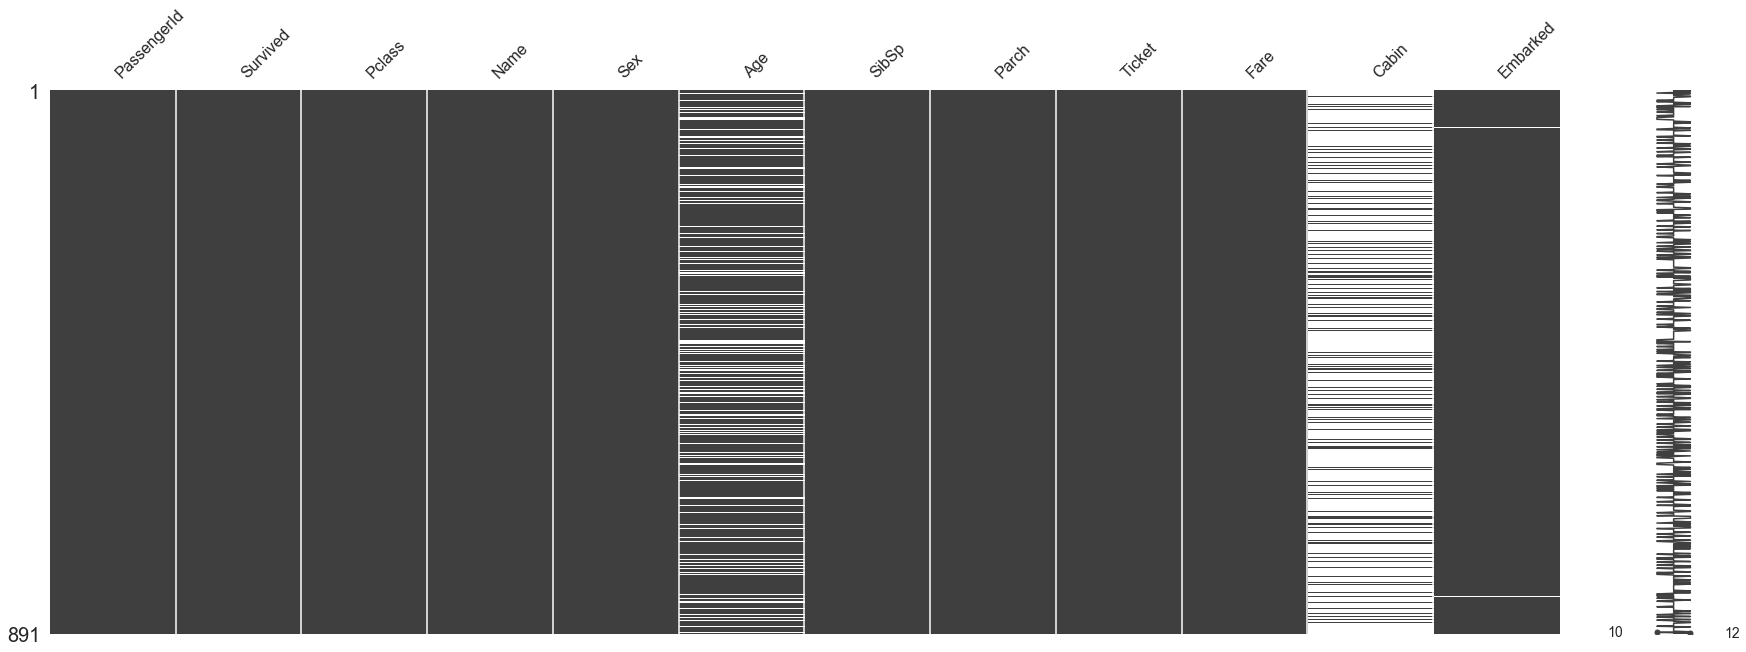

In [18]:
# Check out data types, missing values
print(df_train.info())
print(msno.matrix(df_train, figsize = (30,10)))

In [17]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Plot a bar of "target variable: Survived"

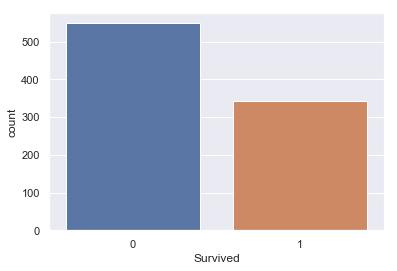

In [18]:
sns.countplot(x="Survived", data=df_train)

## baseline 1:
* assume there are no survivors
* submittion acc: 62.7%

In [27]:
df_test_bl1 = df_test.copy()
df_test_bl1["Survived"] = 0
df_test_bl1[["PassengerId", "Survived"]].to_csv("../submission/no_survivors.csv", index=False)

### Plot a bar of "feature variable: Sex"

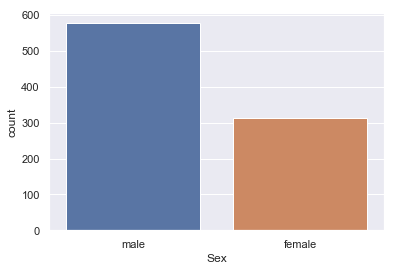

In [28]:
sns.countplot(x="Sex", data=df_train)

### Plot a bar of "target variable: Survived" with "feature variable: Sex"

Sex
female    233
male      109
Name: Survived, dtype: int64 

Proportion of women that survived: 0.742
Proportion of men that survived: 0.189


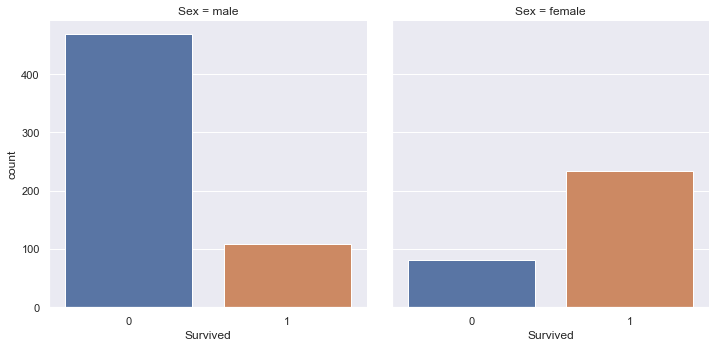

In [100]:
sns.catplot(x="Survived", col="Sex", kind="count", data=df_train)

print(df_train.groupby(["Sex"]).Survived.sum(), "\n")

print("Proportion of women that survived: %.3f" %(df_train[df_train.Sex == "female"].Survived.sum() / df_train[df_train.Sex == "female"].Survived.count()))
print("Proportion of men that survived: %.3f" %(df_train[df_train.Sex == "male"].Survived.sum() / df_train[df_train.Sex == "male"].Survived.count()))

## baseline 2:
* assume that all women survived and all men did not
* submittion acc: 76.7%

In [75]:
df_test_bl2 = df_test.copy()
df_test_bl2["Survived"] = df_test_bl2.Sex == "female"
df_test_bl2["Survived"] = df_test_bl2.Survived.apply(lambda x: int(x))

df_test_bl2.head()

df_test_bl2[["PassengerId", "Survived"]].to_csv("../submission/women_survive.csv", index=False)

### Plot a bar of "target variable: Survived" with "feature variable: Pclass"

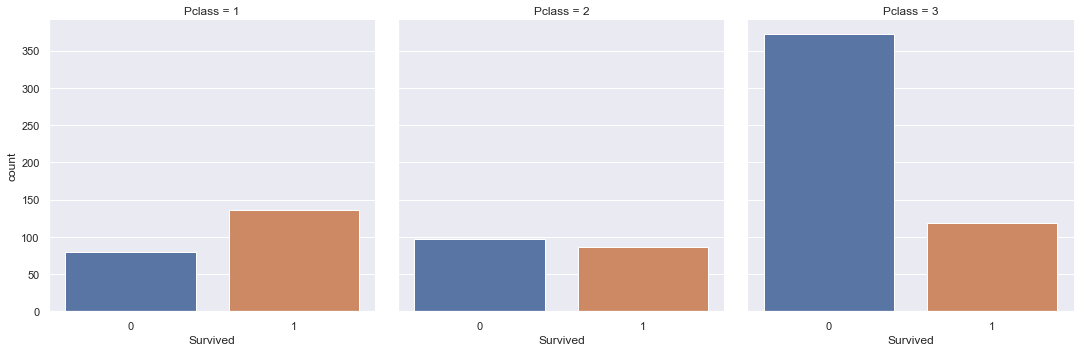

In [78]:
sns.catplot(x="Survived", col="Pclass", kind="count", data=df_train)

### Plot a bar of "target variable: Survived" with "feature variable: Embarked"

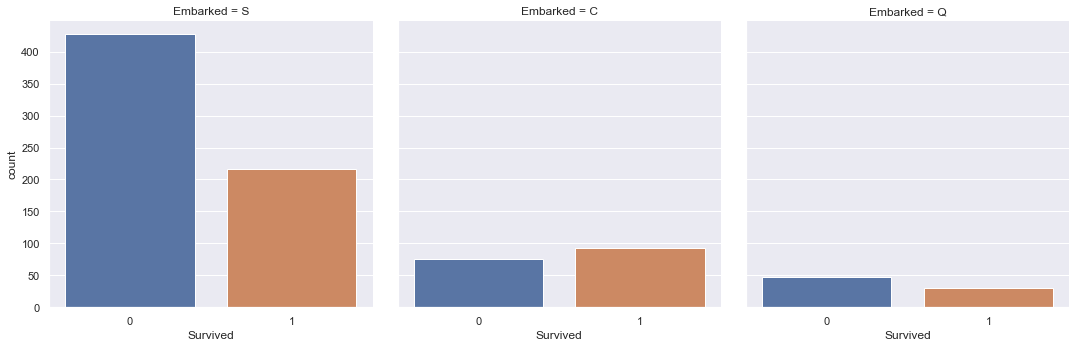

In [146]:
sns.catplot(x="Survived", col="Embarked", kind="count", data=df_train)

# EDA with Numeric Variables

### Plot a histogram of "feature variable: Fare"

/Users/peteryoung/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


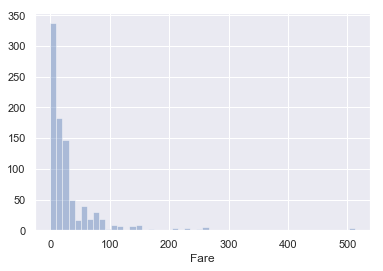

In [157]:
sns.distplot(df_train.Fare, kde=False)

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

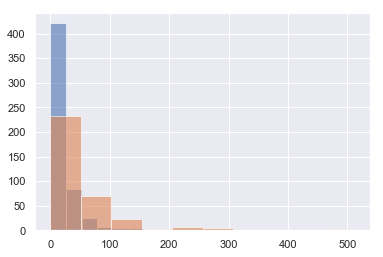

In [144]:
df_train.groupby("Survived").Fare.hist(alpha=0.6)

### Plot a histogram of "feature variable: Age"

/Users/peteryoung/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


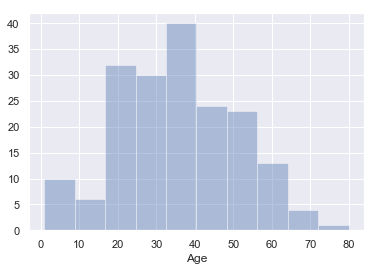

In [117]:
df_train_drop = df_train.dropna()
sns.distplot(df_train_drop.Age, kde=False)

### Plot a strip plot of "target variable: Survived" with "feature variable: Fare"

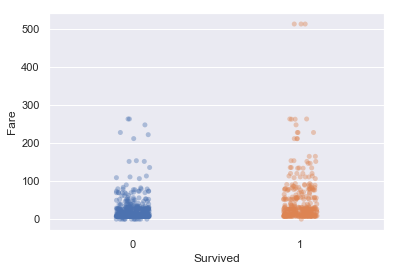

In [148]:
sns.stripplot(x="Survived", y="Fare", data=df_train, alpha=0.4, jitter=True)

### Plot a swarm plot of "target variable: Survived" with "feature variable: Fare"

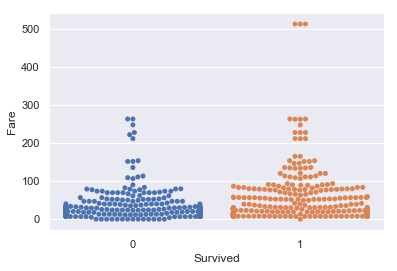

In [147]:
#sns.boxplot(x="Survived", y="Fare", data=df_train, whis=np.inf)
sns.swarmplot(x="Survived", y="Fare", data=df_train)

### Plot a scatter plot of "feature variable: Age" against "feature variable: Fare"

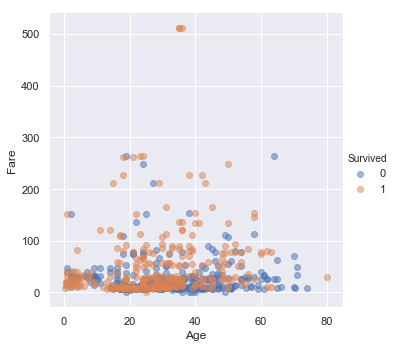

In [151]:
sns.lmplot(x="Age", y="Fare", hue="Survived", data=df_train, fit_reg=False, scatter_kws={'alpha':0.5})

## Plot a pairplot of df_train_drop

/Users/peteryoung/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/peteryoung/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/peteryoung/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/peteryoung/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype

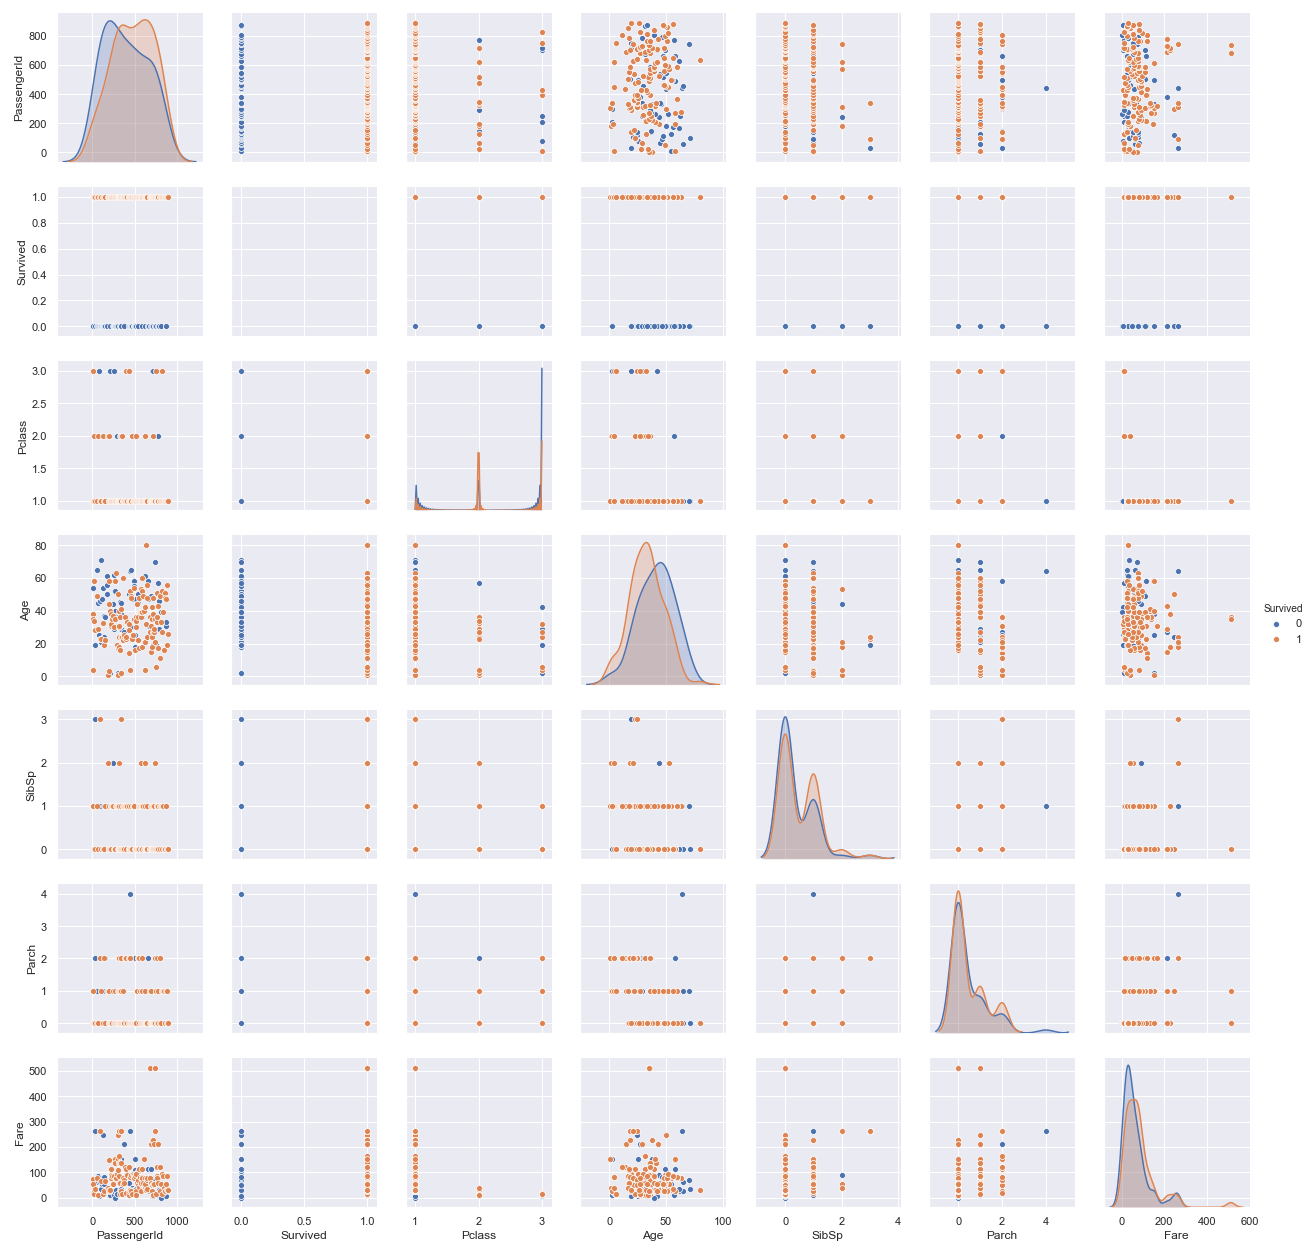

In [155]:
sns.pairplot(df_train_drop, hue="Survived")